In [1]:
#PROYECTO FINAL TRATAMIENTO DE DATOS

##Francisco Salazar H.

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [6]:
data_dir = 'Data/Entrenamiento' 

In [7]:
img = cv2.imread(os.path.join(data_dir,'CLASS_02', '05-CAPTURE_20220421_053226_860.png' ))

In [8]:
img.shape

(216, 384, 3)

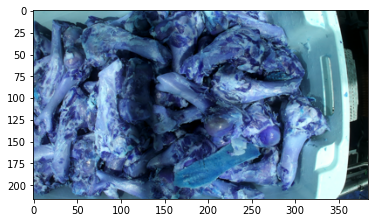

In [9]:
plt.imshow(img)

In [10]:
#Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 275 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

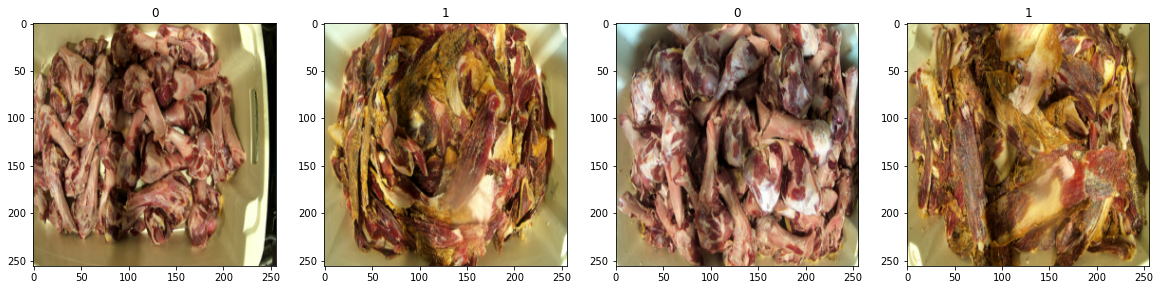

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [52]:
#Scale Data

In [53]:
data = data.map(lambda x,y: (x/255, y))

In [54]:
#Split Data

In [55]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [57]:
#Build a Deep Learning Model

In [58]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [61]:
model = Sequential()

In [62]:
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='categorical_crossentropy',
            metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [65]:
#Train

In [66]:
logdir='logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
6/6 [==============================] - 9s 1s/step - loss: 0.0000e+00 - accuracy: 0.3021 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 2/40
6/6 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 0.2552 - val_loss: 0.0000e+00 - val_accuracy: 0.2188
Epoch 3/40
6/6 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 0.2292 - val_loss: 0.0000e+00 - val_accuracy: 0.2188
Epoch 4/40
6/6 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 0.2292 - val_loss: 0.0000e+00 - val_accuracy: 0.0938
Epoch 5/40
6/6 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 0.2188 - val_loss: 0.0000e+00 - val_accuracy: 0.2188
Epoch 6/40
6/6 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 0.2292 - val_loss: 0.0000e+00 - val_accuracy: 0.3125
Epoch 7/40
6/6 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 0.2344 - val_loss: 0.0000e+00 - val_ac

In [70]:
#Plot Performance

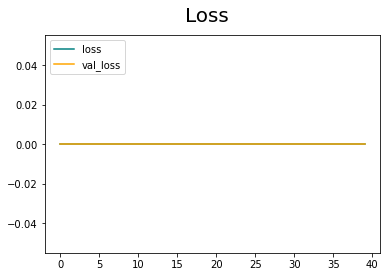

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

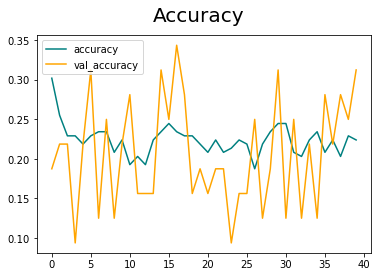

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [73]:
#Evaluate

In [74]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [76]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [77]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [78]:
#Test

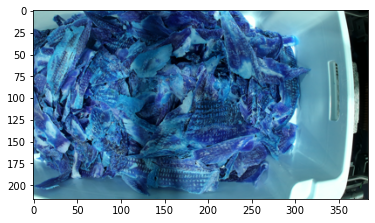

In [79]:
img = cv2.imread('clase3.png')
plt.imshow(img)
plt.show()

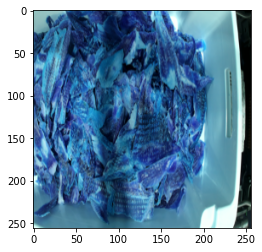

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [82]:
yhat

array([[0.]], dtype=float32)

In [84]:
if yhat > 0.5: 
    print(f'Clase predecida 2')
else:
    print(f'Clase predecida 3')

Clase predecida 3
